# Árbol de regresión Forraje

## Conclusión: Hay un modelo que funciona bien pero el resto funciona maso menos, debajo del 50%, lo cual no esta bueno pero todos los algoritmos probados probados dan una "precisión" parecida.
### El modelo que funciona bien quizas mejore si le agregamos los 200 datos que faltan

## Librerías

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

## Datos

El set de datos son las variables climaticas cerca de los puntos y el valor pastoral de cada punto. Se pretende ajustar un modelo de regresión que permita predecir el valor pastoral en función de las variables climaticas disponibles.

In [5]:
datos = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
datos = datos.drop(['codigo_gps', 'coordenada_completa', 'latitud','longitug', 'dist_laguna_fría','distancia_telsen','dist_gastre'], axis=1)
datos

,feacha,fn_valor_pastoral,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,3.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,0.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,1.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,8.0,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,4.4,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,15.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,11.2,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,13.0,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,11.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   feacha             200 non-null    object 
 1   fn_valor_pastoral  200 non-null    float64
 2   sonda_cercana      200 non-null    object 
 3   sonda_real         200 non-null    object 
 4   acum_anual         200 non-null    float64
 5   acum_verano        200 non-null    float64
 6   tem_max            200 non-null    float64
 7   tem_min            200 non-null    float64
 8   tem_med            200 non-null    float64
 9   viento             200 non-null    float64
 10  humedad            200 non-null    float64
dtypes: float64(8), object(3)
memory usage: 17.3+ KB


## Ajuste del modelo

La clase DecisionTreeRegressor del módulo sklearn.tree permite entrenar árboles de decisión para problemas de regresión. A continuación, se ajusta un árbol de regresión empleando como variable respuesta **valor pastoral** y como predictores todas las otras variables disponibles.

Como en todo estudio de regresión, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer la posterior evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [5]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = ["fn_valor_pastoral", "feacha",'sonda_cercana','sonda_real']),
                                        datos['fn_valor_pastoral'],
                                        random_state = 123
                                    )

In [6]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

In [7]:
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Una vez entrenado el árbol, se puede representar mediante la combinación de las funciones plot_tree() y export_text(). La función plot_tree() dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo. La función export_text() representa esta misma información en formato texto

Profundidad del árbol: 3
Número de nodos terminales: 6


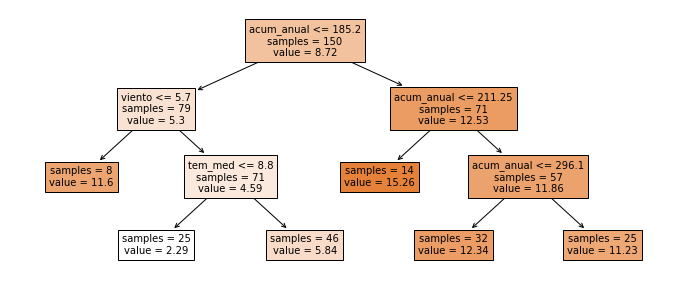

In [8]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = ["fn_valor_pastoral", "feacha",'sonda_cercana','sonda_real']).columns,
            class_names   = 'fn_valor_pastoral',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [9]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(datos.drop(columns = ["fn_valor_pastoral", "feacha", 'sonda_cercana','sonda_real']).columns)
               )
print(texto_modelo)

|--- acum_anual <= 185.20
|   |--- viento <= 5.70
|   |   |--- value: [11.60]
|   |--- viento >  5.70
|   |   |--- tem_med <= 8.80
|   |   |   |--- value: [2.29]
|   |   |--- tem_med >  8.80
|   |   |   |--- value: [5.84]
|--- acum_anual >  185.20
|   |--- acum_anual <= 211.25
|   |   |--- value: [15.26]
|   |--- acum_anual >  211.25
|   |   |--- acum_anual <= 296.10
|   |   |   |--- value: [12.34]
|   |   |--- acum_anual >  296.10
|   |   |   |--- value: [11.23]



Siguiendo la rama más a la izquierda del árbol, puede verse que el modelo predice un VP de 5.65  a partir de acum_anual <= 185.20, viento > 5.70, acum_anual > 131.05 y un viento > 9.15.

## Importancia de predictores

La importancia de cada predictor en el modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el mse, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [10]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = ["fn_valor_pastoral", "feacha", 'sonda_cercana','sonda_real']).columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,acum_anual,0.790233
5,viento,0.132940
4,tem_med,0.076827
1,acum_verano,0.000000
2,tem_max,0.000000
3,tem_min,0.000000
6,humedad,0.000000


El predictor acum_anual, los mm de lluvia acumulados en el año, ha resultado ser el predictor más importante en el modelo, seguido el viento.

## Podado del árbol (pruning)

Con la finalidad de reducir la varianza del modelo y así mejorar la capacidad predictiva, se somete al árbol a un proceso de pruning. Para aplicar el proceso de pruning es necesario indicar el argumento ccp_alpha que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante.

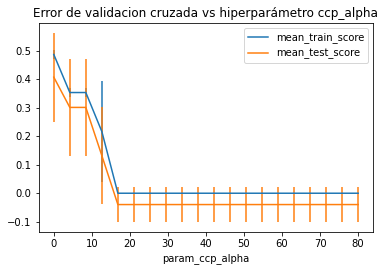

In [11]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [12]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos.

Profundidad del árbol: 4
Número de nodos terminales: 8


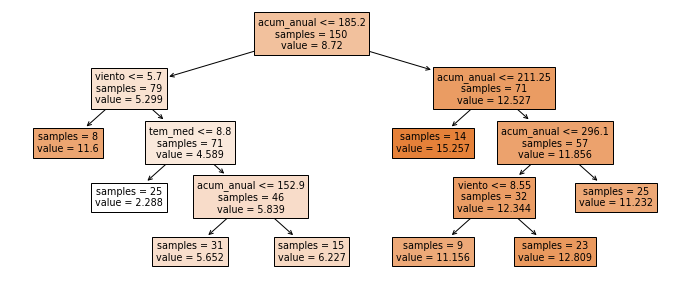

In [13]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = datos.drop(columns = ["fn_valor_pastoral", "feacha", 'sonda_cercana','sonda_real']).columns,
            class_names   = 'fn_valor_pastoral"',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

El proceso de pruning a identificado como mejor árbol uno mucho más grande que el modelo inicialmente entrenado.

## Importancia de predictores

In [14]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = ["fn_valor_pastoral", "feacha", 'sonda_cercana','sonda_real']).columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,acum_anual,0.785281
5,viento,0.138494
4,tem_med,0.076224
1,acum_verano,0.000000
2,tem_max,0.000000
3,tem_min,0.000000
6,humedad,0.000000


## Predicción y evaluación del modelo

Por último, se evalúa la capacidad predictiva del primer árbol y del árbol final empleando el conjunto de test.

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

In [21]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

print('Precisión del modelo entrenamiento:')
print(str(round(modelo.score(X_train, y_train),4))+'%')
print('Precisión del modelo test:')
print(str(round(modelo.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, predicciones),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, predicciones),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, predicciones),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, predicciones),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, predicciones),4)))

El error (rmse) de test es: 4.3067943677437714
Precisión del modelo entrenamiento:
0.4792%
Precisión del modelo test:
0.3652%
Varianza Explicada:
0.3731
MAE:
3.2737
MSE:
18.5485
RMSE:
4.3068
R2:
0.3652


- La Varianza Explicada es de 0.3731, o sea 0.37. ¿Qué significa esto? Qué los datos están dispersos un 37%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.2737, o sea 3.27. ¿Qué significa esto? Qué en promedio se equivoca 3.27 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.27 es medianamente aceptable. Y 3.27 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 18.5485, o sea 18.54. ¿Qué significa esto? Qué en promedio se equivoca 18.54 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 18.54 no es para nada aceptable. Y 18.54 muy está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.3068, o sea 4.31. ¿Qué significa esto? Qué en promedio se equivoca 4.31 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.31 es medianamente aceptable. Y 4.31 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.3652, o sea 0.36. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.36. Esto quiere decir que es un modelo cuyas estimaciones se ajustan maso menos a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 36% a la variable real, o que la calidad del modelo es del 36% o que el rendimiento del modelo es del 36%. 

<br/>

- La Precisión del modelo en el entrenamiento es de 0.4792%%, o sea 48%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.3652%, o sea 36%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas.

**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

In [22]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones_final = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

print('Precisión del modelo entrenamiento:')
print(str(round(modelo_final.score(X_train, y_train),4))+'%')
print('Precisión del modelo test:')
print(str(round(modelo_final.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, predicciones_final),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, predicciones_final),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, predicciones_final),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, predicciones_final),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, predicciones_final),4)))

El error (rmse) de test es: 4.3067943677437714
Precisión del modelo entrenamiento:
0.483%
Precisión del modelo test:
0.3576%
Varianza Explicada:
0.368
MAE:
3.27
MSE:
18.7708
RMSE:
4.3325
R2:
0.3576


- La Varianza Explicada es de 0.368, o sea 0.37. ¿Qué significa esto? Qué los datos están dispersos un 37%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.27, o sea 3.27. ¿Qué significa esto? Qué en promedio se equivoca 3.27 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.27 es medianamente aceptable. Y 3.27 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 18.7708, o sea 18.77. ¿Qué significa esto? Qué en promedio se equivoca 18.77 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 18.77 no es para nada aceptable. Y 18.77 muy está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.3325, o sea 4.33. ¿Qué significa esto? Qué en promedio se equivoca 4.33 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.33 es medianamente aceptable. Y 4.33 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.3576, o sea 0.36. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.36. Esto quiere decir que es un modelo cuyas estimaciones se ajustan maso menos a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 36% a la variable real, o que la calidad del modelo es del 36% o que el rendimiento del modelo es del 36%. 

<br/>

- La Precisión del modelo en el entrenamiento es de 0.483%%, o sea 48%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.3576%, o sea 36%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas.

**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

### Grafiquemos los resultados

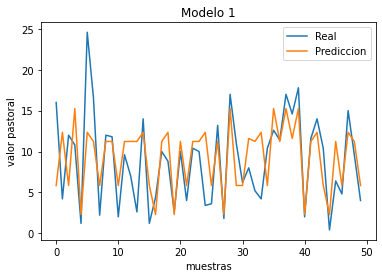

In [23]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(predicciones)),predicciones,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
plt.title("Modelo 1")
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

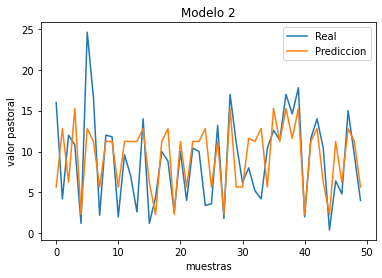

In [24]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(predicciones_final)),predicciones_final,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
plt.title("Modelo 2")
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## VAMOS A PROBAR USANDO LAS TRES VARIABLES MAS CORRELACIONADAS CON EL *VP*

In [6]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = ["fn_valor_pastoral", "feacha",'sonda_cercana','sonda_real','viento','tem_max','tem_med']),
                                        datos['fn_valor_pastoral'],
                                        random_state = 123
                                    )

In [7]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo3 = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 123
          )

In [8]:
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=123)

Profundidad del árbol: 4
Número de nodos terminales: 8


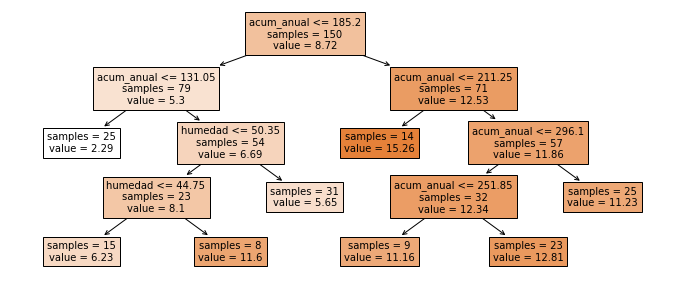

In [9]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo3.get_depth()}")
print(f"Número de nodos terminales: {modelo3.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo3,
            feature_names = datos.drop(columns = ["fn_valor_pastoral", "feacha",'sonda_cercana','sonda_real','viento','tem_max','tem_med']).columns,
            class_names   = 'fn_valor_pastoral',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [10]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = ["fn_valor_pastoral", "feacha",'sonda_cercana','sonda_real','viento','tem_max','tem_med']).columns,
                             'importancia': modelo3.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,acum_anual,0.914351
3,humedad,0.085649
1,acum_verano,0.000000
2,tem_min,0.000000


### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

In [13]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo3.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

print('Precisión del modelo entrenamiento:')
print(str(round(modelo3.score(X_train, y_train),4))+'%')
print('Precisión del modelo test:')
print(str(round(modelo3.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, predicciones),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, predicciones),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, predicciones),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, predicciones),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, predicciones),4)))

El error (rmse) de test es: 4.33252801895408
Precisión del modelo entrenamiento:
0.483%
Precisión del modelo test:
0.3576%
Varianza Explicada:
0.368
MAE:
3.27
MSE:
18.7708
RMSE:
4.3325
R2:
0.3576


- La Varianza Explicada es de 0.368, o sea 0.37. ¿Qué significa esto? Qué los datos están dispersos un 37%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.27, o sea 3.27. ¿Qué significa esto? Qué en promedio se equivoca 3.27 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.27 es medianamente aceptable. Y 3.27 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 18.7708, o sea 18.77. ¿Qué significa esto? Qué en promedio se equivoca 18.77 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 18.77 no es para nada aceptable. Y 18.77 muy está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.3325, o sea 4.33. ¿Qué significa esto? Qué en promedio se equivoca 4.33 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.33 es medianamente aceptable. Y 4.33 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.3576, o sea 0.36. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.36. Esto quiere decir que es un modelo cuyas estimaciones se ajustan maso menos a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 36% a la variable real, o que la calidad del modelo es del 36% o que el rendimiento del modelo es del 36%. 

<br/>

- La Precisión del modelo en el entrenamiento es de 0.483%%, o sea 48%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.3576%, o sea 36%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas.

**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

### Grafiquemos los resultados

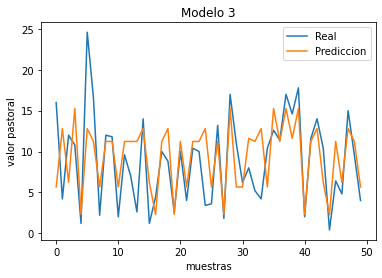

In [14]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(predicciones)),predicciones,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
plt.title("Modelo 3")
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## VAMOS A PROBAR USANDO EL AGRUPAMEIENTO POR ACUMULADO DE LLUVIA ANUAL

In [15]:
df = datos.groupby(by='acum_anual',as_index=False).mean()
df

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,119.8,2.245161,13.7,14.3,2.6,8.5,14.2,53.7
1,142.3,5.865000,13.7,14.3,3.9,9.1,12.0,52.1
2,156.1,11.540000,42.3,19.8,7.2,13.6,5.1,48.6
3,160.7,1.200000,42.3,20.0,7.3,13.6,6.3,40.9
4,163.5,6.700000,42.3,20.0,7.3,13.6,6.3,40.9
5,206.9,15.200000,53.5,19.8,7.2,13.6,5.1,48.6
6,215.6,11.155556,53.5,19.8,7.2,13.6,5.1,48.6
7,288.1,12.348387,58.2,14.3,3.9,9.1,12.0,52.1
8,304.1,10.687805,58.2,14.3,3.9,9.1,12.0,52.1


In [16]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = ["fn_valor_pastoral",'tem_max','tem_med']),
                                        df['fn_valor_pastoral'],
                                        random_state = 123
                                    )

In [18]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo4 = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 123
          )

In [19]:
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=123)

Profundidad del árbol: 4
Número de nodos terminales: 6


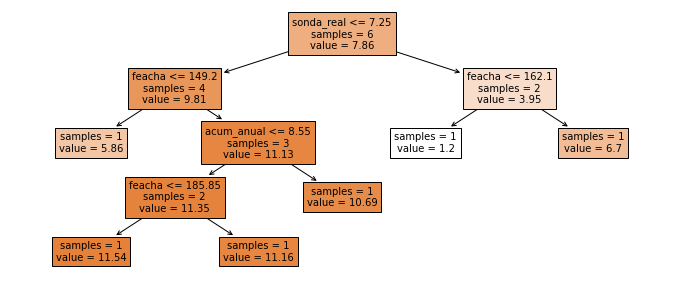

In [20]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo4.get_depth()}")
print(f"Número de nodos terminales: {modelo4.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo4,
            feature_names = datos.drop(columns = ["fn_valor_pastoral",'tem_max','tem_med']).columns,
            class_names   = 'fn_valor_pastoral',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [21]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = ["fn_valor_pastoral",'tem_max','tem_med']).columns,
                             'importancia': modelo4.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,tem_min,0.558216
0,acum_anual,0.438246
3,viento,0.003538
1,acum_verano,0.000000
4,humedad,0.000000


### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

In [24]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo4.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

print('Precisión del modelo entrenamiento:')
print(str(round(modelo4.score(X_train, y_train),4))+'%')
print('Precisión del modelo test:')
print(str(round(modelo4.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, predicciones),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, predicciones),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, predicciones),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, predicciones),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, predicciones),4)))

El error (rmse) de test es: 3.277107284045063
Precisión del modelo entrenamiento:
1.0%
Precisión del modelo test:
0.6524%
Varianza Explicada:
0.668
MAE:
3.1083
MSE:
10.7394
RMSE:
3.2771
R2:
0.6524


- La Varianza Explicada es de 0.668, o sea 0.67. ¿Qué significa esto? Qué los datos están dispersos un 67%, y al tener un valor no tan por debajo de 1.0, es una metrica medianamente buena.
- El Error medio absoluto (MAE) es de 3.1083, o sea 3.11. ¿Qué significa esto? Qué en promedio se equivoca 3.11 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.11 es medianamente aceptable. Y 3.11 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 10.7394, o sea 10.74. ¿Qué significa esto? Qué en promedio se equivoca 10.74 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 10.74 no es aceptable. Y 10.74  está lejos de 0, lo cual es malo.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 3.2771, o sea 3.28. ¿Qué significa esto? Qué en promedio se equivoca 3.28 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.28 es medianamente aceptable. Y 3.28 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.6524, o sea 0.65. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.65. Esto quiere decir que es un modelo cuyas estimaciones se ajustan maso menos bien a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 65% a la variable real, o que la calidad del modelo es del 65% o que el rendimiento del modelo es del 65%. 

<br/>

- La Precisión del modelo en el entrenamiento es de 1.0%, o sea 100%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.6524%, o sea 65%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas.

**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

OBSERVACION: Quizas cuando agreguemos mas datos funcione un poco mejor y este seria el modelo a utilizar. 

### Grafiquemos los resultados

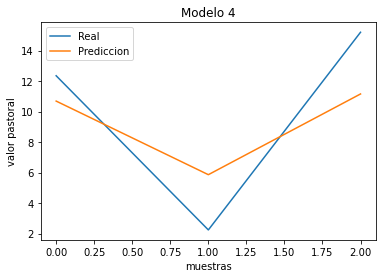

In [25]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(predicciones)),predicciones,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
plt.title("Modelo 4")
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Comparar las 4 pruebas

In [28]:
tabla = pd.DataFrame(columns=['modelo', 'VE', 'MAE', 'MSE', 'RMSE','R2'],index=range(4))
tabla.iloc[0] = ('prediccion1',0.43,3.35,16.2,4.03,0.41)
tabla.iloc[1] = ('prediccion2',0.37,3.67,21.61,4.65,0.37)
tabla.iloc[2] = ('prediccion3',0.37,3.67,21.61,4.65,0.37)
tabla.iloc[3] = ('prediccion4',0.67,3.11,10.74,3.28,0.65)
tabla

,modelo,VE,MAE,MSE,RMSE,R2
0,prediccion1,0.43,3.35,16.2,4.03,0.41
1,prediccion2,0.37,3.67,21.61,4.65,0.37
2,prediccion3,0.37,3.67,21.61,4.65,0.37
3,prediccion4,0.67,3.11,10.74,3.28,0.65


Si consideramos las metricas MAE Y RMSE como las mas significativas, el mejor modelo es el de la prediccion 4.

Si consideramos la VE como la importante entonces el mejor modelo es el de la prediccion 4.

Si consideramos el R2 como el mas significativo, el modelo de la prediccion 4 es el mejor.

Según diferentes lecturas el MSE y el R2 son las mas utilizadas para regresión, y si miramos las metricas de los modelos el valor de MSE en ninguno esta muuuy cerca de 0 y el valor de R2 en ninguno esta muuuuy cerca de 1, lo cual indica que ninguno funciona excelente.

## Conclusión: Hay un modelo que funciona bien pero el resto funciona maso menos, debajo del 50%, lo cual no esta bueno pero todos los algoritmos probados probados dan una "precisión" parecida.
### El modelo que funciona bien quizas mejore si le agregamos los 200 datos que faltan